# Transformação de dados

Remover estacionaridade, tendencia e tentar aproximar a série temporal de uma Gausiana

In [1]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
from random import sample, random
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6


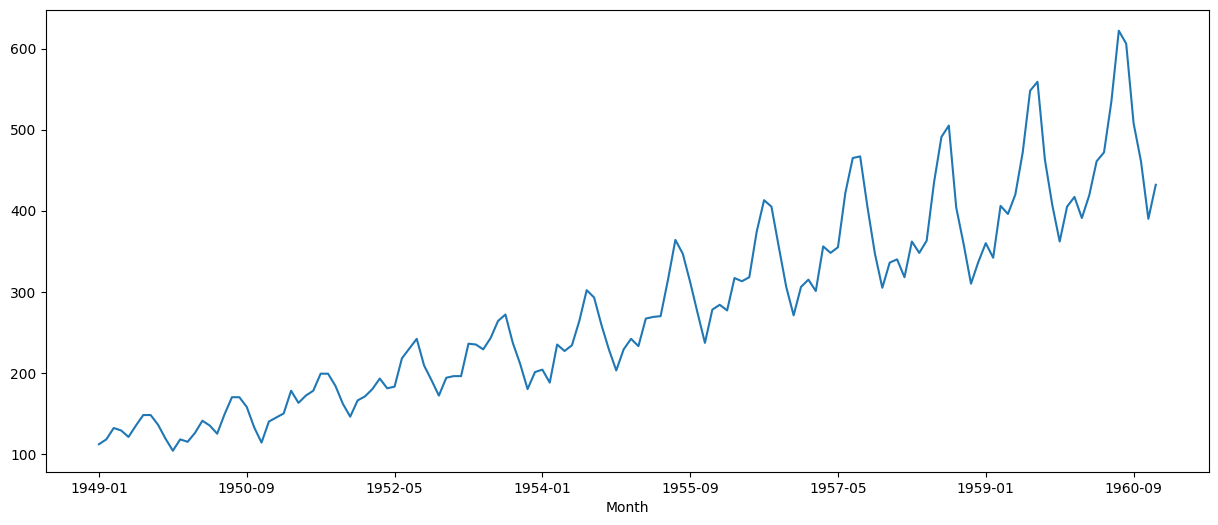

In [2]:
airpassengers = pd.read_csv('AirPassengers.csv', sep = ',')
serie = pd.Series(airpassengers['#Passengers'].values, 
                  index = airpassengers['Month'])

serie.plot()
plt.show()

# Normalidade

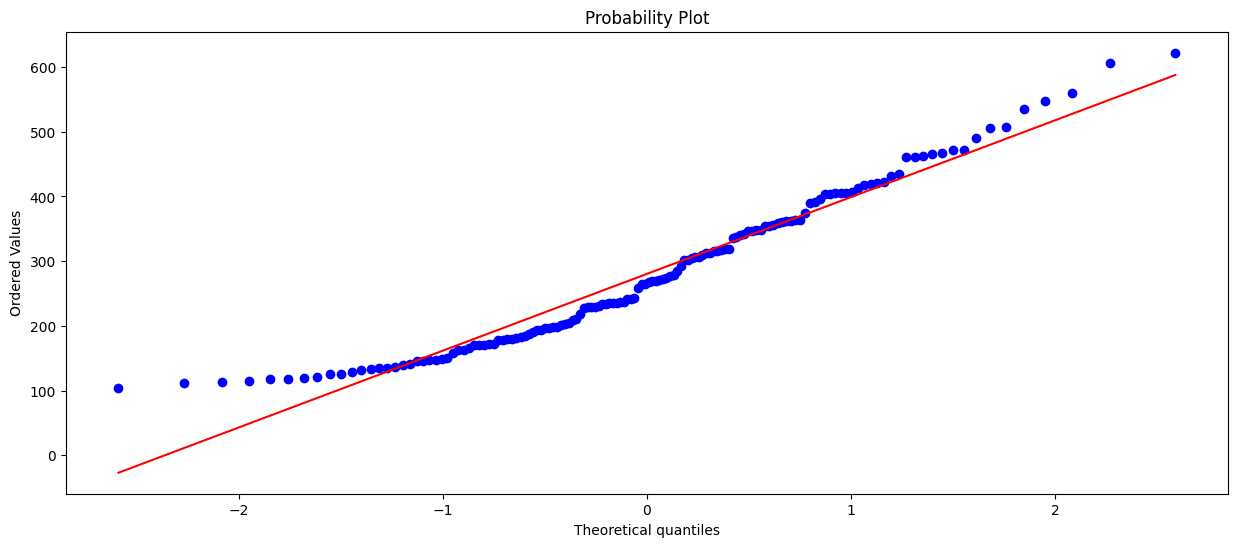

In [3]:
import scipy.stats as stats

stats.probplot(serie, dist="norm", plot=plt)
plt.show()

# Shapiro Wilks

CRITÉRIOS:

NÍVEL DE SIGNIFICÂNCIA DE 0,05 ou 5% (MAIS UTILIZADO)

QUANDO p > 0,05 (distribuição normal).

In [4]:
e,p = stats.shapiro(serie)

print('Estatística de teste: \t {:.10f}'.format(e))
print('p-valor: \t\t {:.10f}'.format(p))

Estatística de teste: 	 0.9519579411
p-valor: 		 0.0000683274


In [5]:
# transformacao por log para diminuir variancia e tentar ficar normalizado

serie_transf_log = np.log(serie)
serie_transf_log


Month
1949-01    4.718499
1949-02    4.770685
1949-03    4.882802
1949-04    4.859812
1949-05    4.795791
             ...   
1960-08    6.406880
1960-09    6.230481
1960-10    6.133398
1960-11    5.966147
1960-12    6.068426
Length: 144, dtype: float64

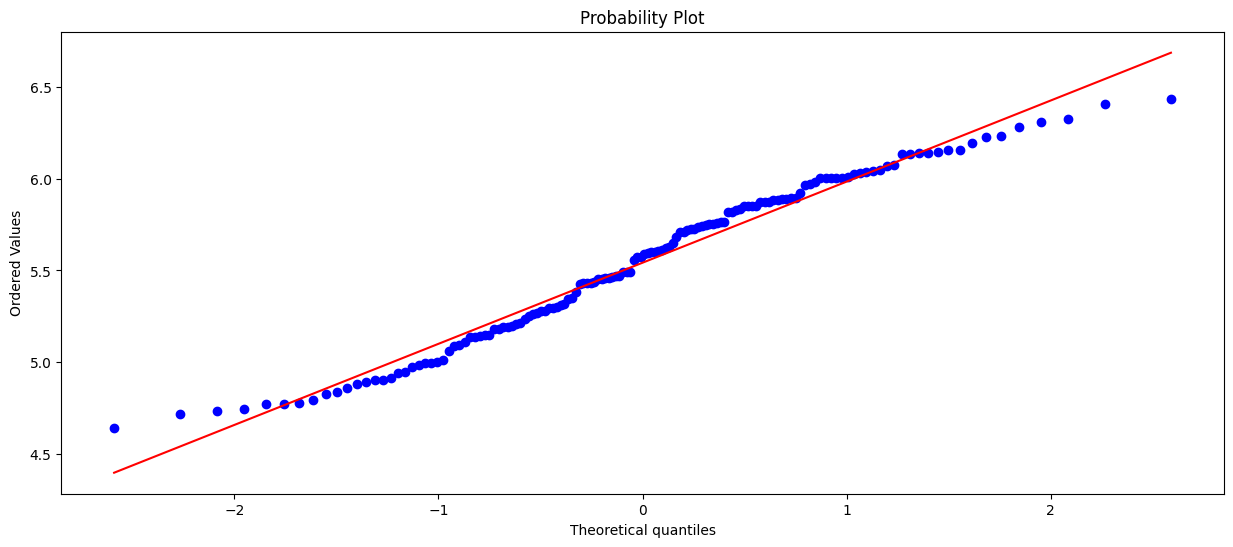

In [6]:
import scipy.stats as stats

stats.probplot(serie_transf_log, dist="norm", plot=plt)
plt.show()

# Shapiro Wilks

CRITÉRIOS:

NÍVEL DE SIGNIFICÂNCIA DE 0,05 ou 5% (MAIS UTILIZADO)

QUANDO p > 0,05 (distribuição normal).

In [7]:
e,p = stats.shapiro(serie_transf_log)

print('Estatística de teste: \t {:.10f}'.format(e))
print('p-valor: \t\t {:.10f}'.format(p))

Estatística de teste: 	 0.9732357860
p-valor: 		 0.0063740211


In [8]:
# transformacao por raiz cubica (dados com valor zero ou negativo)

# serie_transf_raizcubica = serie ** (1/3)
serie_transf_raizcubica = np.sign(serie)*abs(serie)**(1/3)
serie_transf_raizcubica


Month
1949-01    4.820285
1949-02    4.904868
1949-03    5.091643
1949-04    5.052774
1949-05    4.946087
             ...   
1960-08    8.462348
1960-09    7.979112
1960-10    7.725032
1960-11    7.306144
1960-12    7.559526
Length: 144, dtype: float64

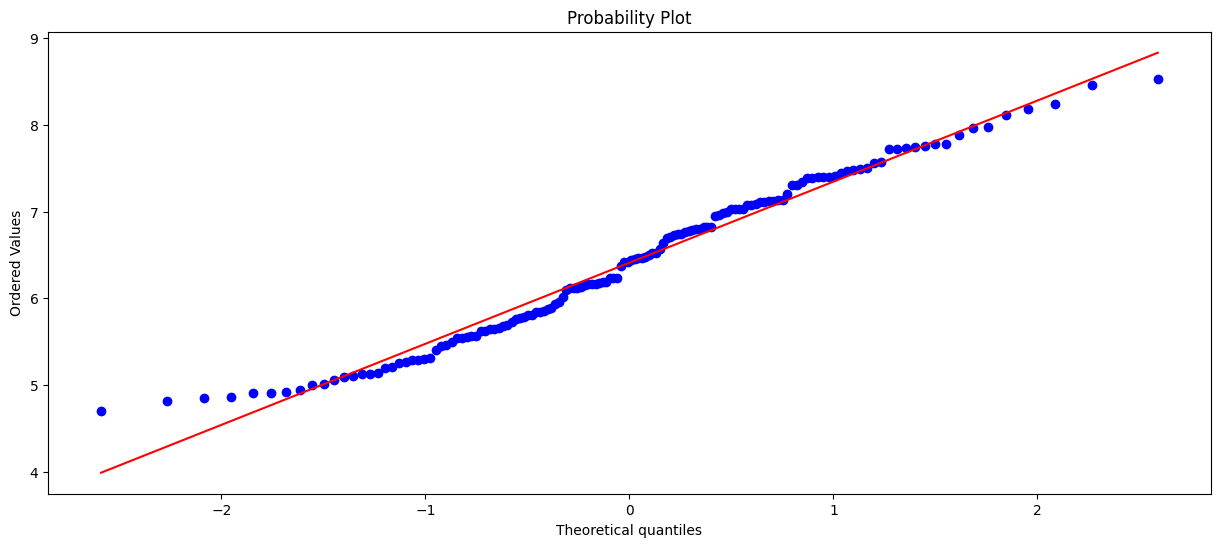

In [9]:
import scipy.stats as stats

stats.probplot(serie_transf_raizcubica, dist="norm", plot=plt)
plt.show()

# Shapiro Wilks

CRITÉRIOS:

NÍVEL DE SIGNIFICÂNCIA DE 0,05 ou 5% (MAIS UTILIZADO)

QUANDO p > 0,05 (distribuição normal).

In [10]:
e,p = stats.shapiro(serie_transf_raizcubica)

print('Estatística de teste: \t {:.10f}'.format(e))
print('p-valor: \t\t {:.10f}'.format(p))

Estatística de teste: 	 0.9745993018
p-valor: 		 0.0088355085


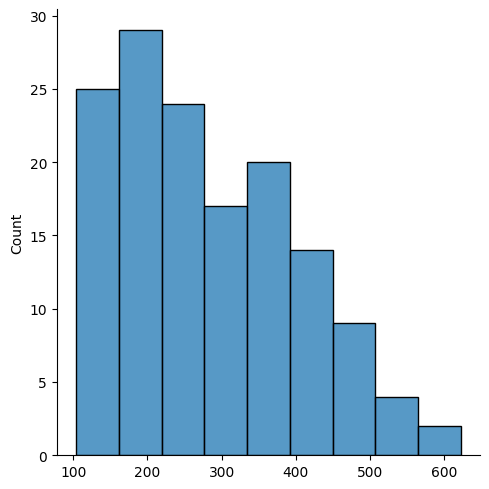

In [11]:
import seaborn as sns

# sns.distplot(serie_transf_raizcubica)
sns.displot(serie)
# sns.histplot(serie_transf_raizcubica)

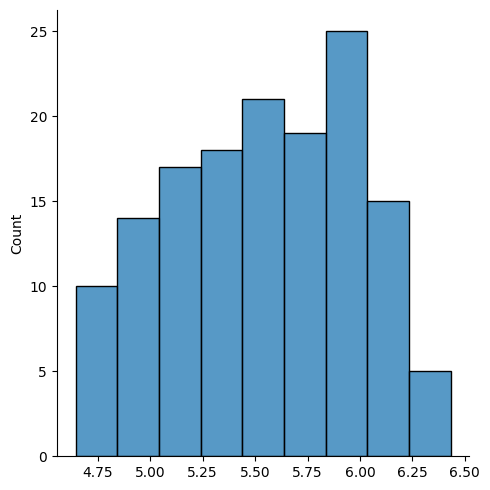

In [12]:
import seaborn as sns

# sns.distplot(serie_transf_raizcubica)
sns.displot(serie_transf_log)
# sns.histplot(serie_transf_raizcubica)

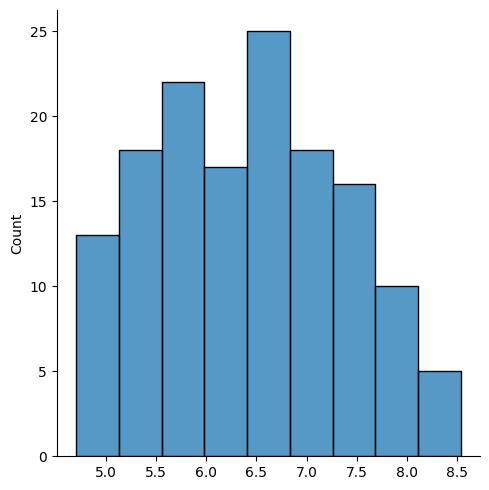

In [13]:
import seaborn as sns

# sns.distplot(serie_transf_raizcubica)
sns.displot(serie_transf_raizcubica)
# sns.histplot(serie_transf_raizcubica)

# Diferenciação

Transformar a serie não estacionária em serie estacionária

Teste KPSS (Kwiatkowski-Phillips-Schmidt-Shin)

Ha = não é estacionário: estatística do teste > valor crítico

Ho = é estacionário:  estatística do teste < valor crítico

In [14]:
import statsmodels.tsa.stattools as stats_kp

kpss = stats_kp.kpss(serie_transf_raizcubica)

print('Estatítica do teste: \t\t\t {:.4f}'.format(kpss[0]))
print('p_valor:  \t\t\t\t {:.4f}'.format(kpss[1]))
print('Valores Críticos:')
for chave, valor in kpss[3].items():
    print('\t\t{}: {:.4f}'.format(chave, valor))

Estatítica do teste: 			 1.6735
p_valor:  				 0.0100
Valores Críticos:
		10%: 0.3470
		5%: 0.4630
		2.5%: 0.5740
		1%: 0.7390


/var/folders/gt/rtqg_w150cjfswljghbp3d5r0000gp/T/ipykernel_29022/2943903847.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss = stats_kp.kpss(serie_transf_raizcubica)


# Adfuller

Teste df (Dickey Fuller)

Ha = não é estacionário: estatística do teste > valor crítico

Ho = é estacionário:  estatística do teste < valor crítico

In [15]:
import statsmodels.tsa.stattools as stats_kp

adfl = stats_kp.adfuller(serie_transf_raizcubica)

print('Estatítica do teste: \t\t\t {:.4f}'.format(adfl[0]))
print('p_valor:  \t\t\t\t {:.4f}'.format(adfl[1]))
print('Valores Críticos:')
for chave, valor in adfl[4].items():
    print('\t\t{}: {:.4f}'.format(chave, valor))



Estatítica do teste: 			 -0.8100
p_valor:  				 0.8162
Valores Críticos:
		1%: -3.4817
		5%: -2.8840
		10%: -2.5788


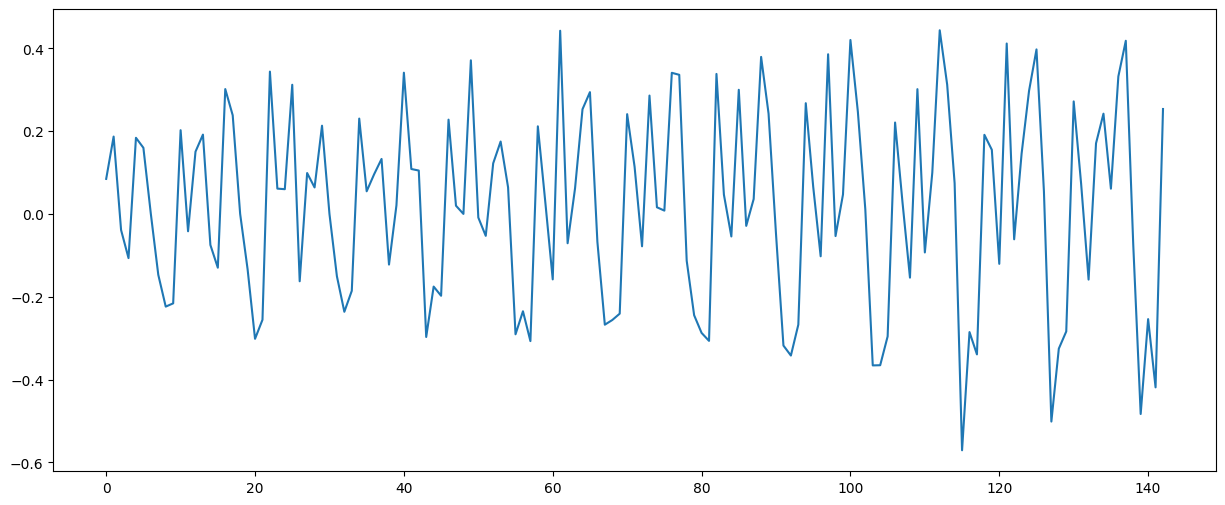

In [16]:
transf_diferenciacao = np.diff(serie_transf_raizcubica)


plt.plot(transf_diferenciacao)
plt.show()

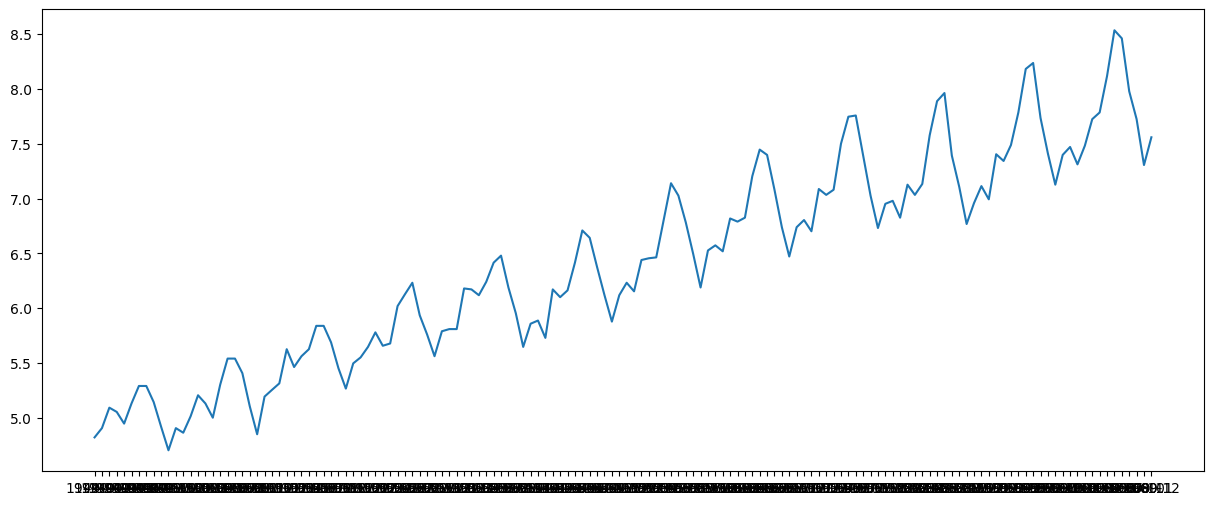

In [17]:
# transf_diferenciacao = np.diff(serie_transf_raizcubica)


plt.plot(serie_transf_raizcubica)
plt.show()

Teste KPSS (Kwiatkowski-Phillips-Schmidt-Shin)

Ho = não é estacionário: estatística do teste > valor crítico

Ha = é estacionário:  estatística do teste < valor crítico

In [19]:
kpss = stats_kp.kpss(serie_transf_raizcubica)
print('Estatítica do teste: {:.4f}'.format(kpss[0]))
print('p_valor: {:.4f}'.format(kpss[1]))
print('Valores Críticos:')
for chave, valor in kpss[3].items():
   print('{}: {:.4f}'.format(chave, valor))

Estatítica do teste: 1.6735
p_valor: 0.0100
Valores Críticos:
10%: 0.3470
5%: 0.4630
2.5%: 0.5740
1%: 0.7390


/var/folders/gt/rtqg_w150cjfswljghbp3d5r0000gp/T/ipykernel_29022/858817850.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss = stats_kp.kpss(serie_transf_raizcubica)


# Diferenciação de segunda ordem

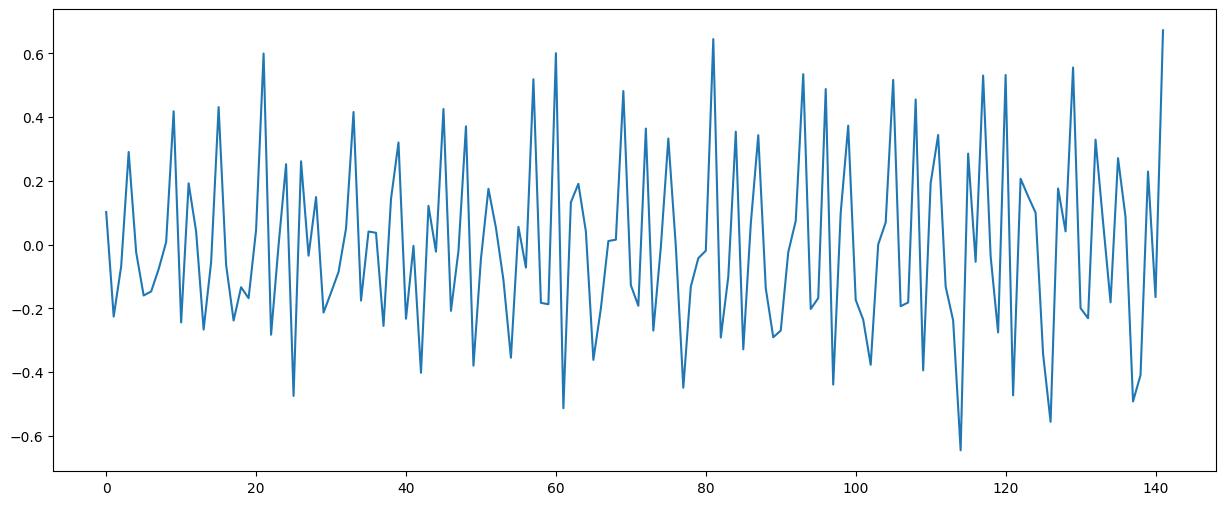

In [20]:
transf_diferenciacao2 = np.diff(transf_diferenciacao)


plt.plot(transf_diferenciacao2)
plt.show()

In [21]:
kpss = stats_kp.kpss(transf_diferenciacao2)
print('Estatítica do teste: {:.4f}'.format(kpss[0]))
print('p_valor: {:.4f}'.format(kpss[1]))
print('Valores Críticos:')
for chave, valor in kpss[3].items():
   print('{}: {:.4f}'.format(chave, valor))

Estatítica do teste: 0.0762
p_valor: 0.1000
Valores Críticos:
10%: 0.3470
5%: 0.4630
2.5%: 0.5740
1%: 0.7390


/var/folders/gt/rtqg_w150cjfswljghbp3d5r0000gp/T/ipykernel_29022/3215267267.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss = stats_kp.kpss(transf_diferenciacao2)


# Reversão da transformação e diferenciação

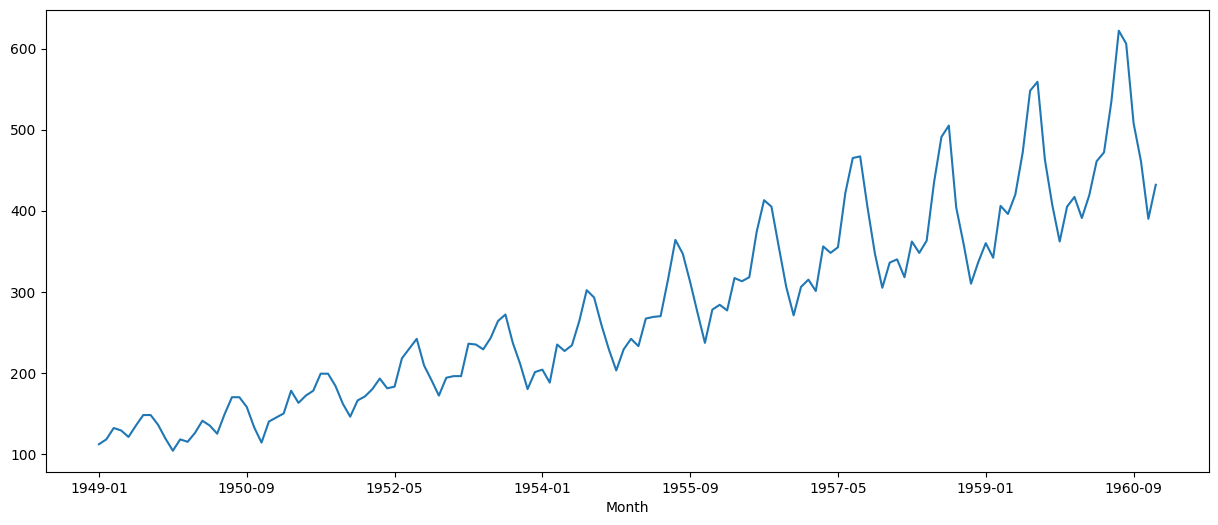

In [22]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
from random import sample, random
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6



airpassengers = pd.read_csv('AirPassengers.csv', sep = ',')
serie = pd.Series(airpassengers['#Passengers'].values, 
                  index = airpassengers['Month'])

serie.plot()
plt.show()

In [26]:
serie

Month
1949-01    112
1949-02    118
1949-03    132
1949-04    129
1949-05    121
          ... 
1960-08    606
1960-09    508
1960-10    461
1960-11    390
1960-12    432
Length: 144, dtype: int64

In [24]:
#transformacao

serie2 = np.log(serie)
serie2

Month
1949-01    4.718499
1949-02    4.770685
1949-03    4.882802
1949-04    4.859812
1949-05    4.795791
             ...   
1960-08    6.406880
1960-09    6.230481
1960-10    6.133398
1960-11    5.966147
1960-12    6.068426
Length: 144, dtype: float64

In [25]:
serie_revertida = np.e**serie2
serie_revertida

Month
1949-01    112.0
1949-02    118.0
1949-03    132.0
1949-04    129.0
1949-05    121.0
           ...  
1960-08    606.0
1960-09    508.0
1960-10    461.0
1960-11    390.0
1960-12    432.0
Length: 144, dtype: float64

In [27]:
#transformacao

serie10 = np.log10(serie)
serie10

Month
1949-01    2.049218
1949-02    2.071882
1949-03    2.120574
1949-04    2.110590
1949-05    2.082785
             ...   
1960-08    2.782473
1960-09    2.705864
1960-10    2.663701
1960-11    2.591065
1960-12    2.635484
Length: 144, dtype: float64

In [28]:
serie_revertida = 10**serie10
serie_revertida

Month
1949-01    112.0
1949-02    118.0
1949-03    132.0
1949-04    129.0
1949-05    121.0
           ...  
1960-08    606.0
1960-09    508.0
1960-10    461.0
1960-11    390.0
1960-12    432.0
Length: 144, dtype: float64

In [29]:
#transformacao

serie_1_over_3 = serie**(1/3)
serie_1_over_3

Month
1949-01    4.820285
1949-02    4.904868
1949-03    5.091643
1949-04    5.052774
1949-05    4.946087
             ...   
1960-08    8.462348
1960-09    7.979112
1960-10    7.725032
1960-11    7.306144
1960-12    7.559526
Length: 144, dtype: float64

In [30]:
#transformacao

serie_1_over_3_reversa = serie_1_over_3**3
serie_1_over_3_reversa

Month
1949-01    112.0
1949-02    118.0
1949-03    132.0
1949-04    129.0
1949-05    121.0
           ...  
1960-08    606.0
1960-09    508.0
1960-10    461.0
1960-11    390.0
1960-12    432.0
Length: 144, dtype: float64

### Reversão da diferenciação

In [32]:
serie_diferenciada = serie.diff()
serie_diferenciada

Month
1949-01     NaN
1949-02     6.0
1949-03    14.0
1949-04    -3.0
1949-05    -8.0
           ... 
1960-08   -16.0
1960-09   -98.0
1960-10   -47.0
1960-11   -71.0
1960-12    42.0
Length: 144, dtype: float64

In [33]:
serie_revertida = serie.shift(1) + serie_diferenciada
serie_revertida

Month
1949-01      NaN
1949-02    118.0
1949-03    132.0
1949-04    129.0
1949-05    121.0
           ...  
1960-08    606.0
1960-09    508.0
1960-10    461.0
1960-11    390.0
1960-12    432.0
Length: 144, dtype: float64

### Mantendo no formato dataframe

In [38]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
from random import sample, random
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6



airpassengers = pd.read_csv('AirPassengers.csv', sep = ',')


#airpassengers['#Passengers'] - airpassengers['#Passengers'].shift()
airpassengers['valor_diferenciado'] = airpassengers['#Passengers'].diff()

airpassengers['valor_diferenciado_revertido'] = airpassengers['#Passengers'].shift(1) + airpassengers['valor_diferenciado']
airpassengers

,Month,#Passengers,valor_diferenciado,valor_diferenciado_revertido
0,1949-01,112,NaN,NaN
1,1949-02,118,6.0,118.0
2,1949-03,132,14.0,132.0
3,1949-04,129,-3.0,129.0
4,1949-05,121,-8.0,121.0
...,...,...,...,...
139,1960-08,606,-16.0,606.0
140,1960-09,508,-98.0,508.0
141,1960-10,461,-47.0,461.0
142,1960-11,390,-71.0,390.0
